Data Analysis of Food Truck Frenzy


Load Data, and check first few rows to ensure correct data file was loaded.

In [ ]:
import pandas as pd

# Load the data files
food_truck_sales_data = pd.read_csv('FoodTruckSalesData.csv')
item_prices_data = pd.read_csv('ItemPrices.csv')

# Display the first few rows of each DataFrame
food_truck_sales_data.head(), item_prices_data.head()

Calcuate Total Sales per Item and Location

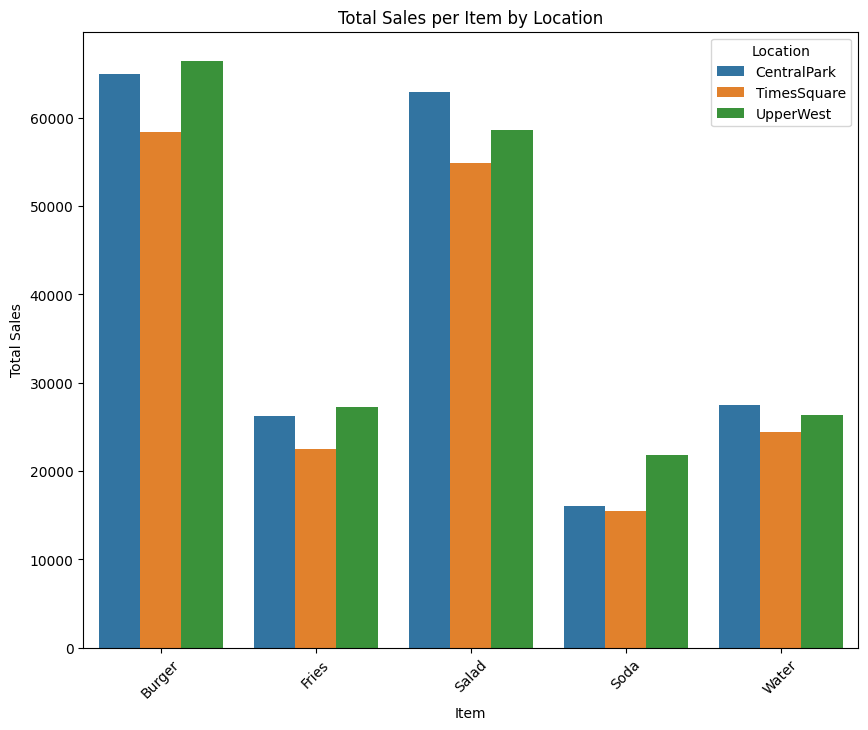

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

merged_data = pd.merge(food_truck_sales_data, item_prices_data, on=['Location','Item'])
merged_data['TotalSales'] = merged_data['Quantity Sold'] * merged_data['SalePrice']
total_sales = merged_data.groupby(['Location', 'Item'])['TotalSales'].sum().reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=total_sales, x='Item', y='TotalSales', hue='Location')
plt.title('Total Sales per Item by Location')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.legend(title='Location')
plt.xticks(rotation=45)
plt.show()


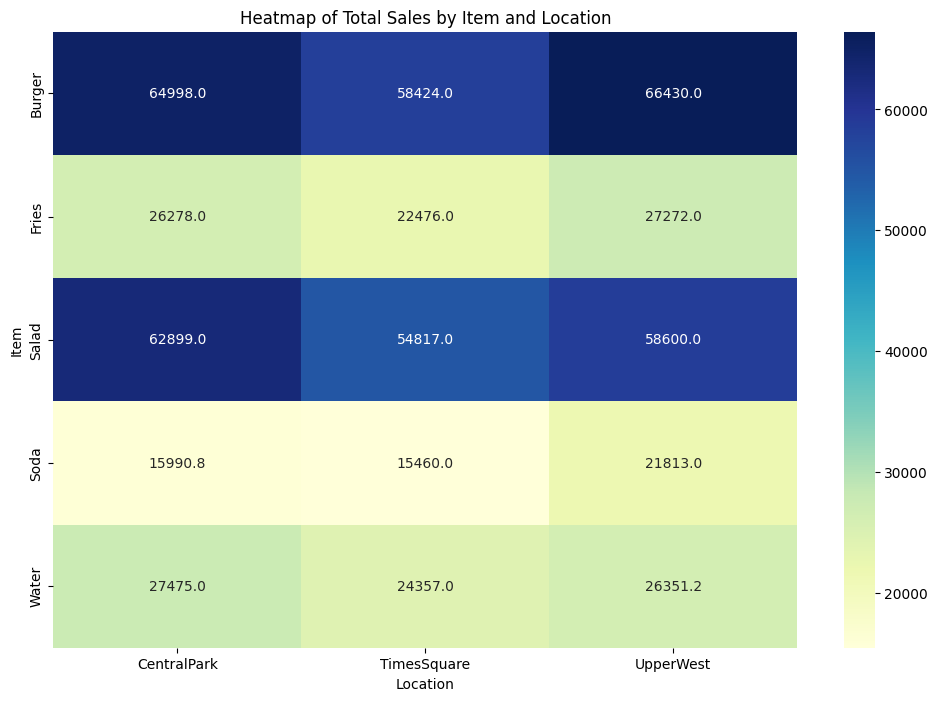

In [16]:
pivot_table = total_sales.pivot(index="Item", columns="Location", values="TotalSales")

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Total Sales by Item and Location')
plt.xlabel('Location')
plt.ylabel('Item')
plt.show()

In [17]:
total_sales_summary = total_sales.groupby('Location')['TotalSales'].sum().reset_index()
print(total_sales_summary)

      Location  TotalSales
0  CentralPark   197640.75
1  TimesSquare   175534.00
2    UpperWest   200466.25
